In [109]:
import pandas as pd
import seaborn as sns
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [172]:
data = pd.read_csv(r'C:\Users\Денис\DataScience\University\Semen_VKR\vkr_banking_prediction\data\raw\dataset.txt', 
                   sep = ',', 
                   encoding = 'utf_8')

In [173]:
data.isna().sum()

account_id                0
age                       0
gender                    0
amount                    0
duration                  0
payments                  0
status                    0
popul                     0
average_salary            0
unemployment_96 / 100     0
enterpreneurs_per_1000    0
crimes_96 / popul         0
card_type                 0
month_outcome             3
month_income              0
dtype: int64

In [174]:
data = data.fillna(method = 'backfill')

In [175]:
data

,account_id,age,gender,amount,duration,payments,status,popul,average_salary,unemployment_96 / 100,enterpreneurs_per_1000,crimes_96 / popul,card_type,month_outcome,month_income
0,2,48,m,80952,24,3373.0,A,1204953,12541,0.0043,167,0.0822,no,12751.466667,19057.108333
1,19,57,f,30276,12,2523.0,B,103347,9104,0.0207,123,0.0228,no,5077.353846,6209.723077
2,25,35,m,30276,12,2523.0,A,228848,9893,0.0472,96,0.0257,no,15435.396610,17104.293220
3,37,46,m,318480,60,5308.0,D,70646,8547,0.0364,120,0.0218,no,5642.565217,6483.476812
4,38,58,f,110736,48,2307.0,C,51428,8402,0.0398,120,0.0214,no,1668.111111,2355.614286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,11327,19,f,39168,24,1632.0,C,94725,9920,0.0287,130,0.0512,no,2710.964706,3624.483824
678,11328,45,f,280440,60,4674.0,C,387570,9897,0.0196,140,0.0482,no,5541.196970,6772.762121
679,11349,49,f,419880,60,6998.0,C,1204953,12541,0.0043,167,0.0822,no,6287.454545,7036.075758
680,11359,28,m,54024,12,4502.0,A,117897,8814,0.0574,107,0.0175,classic,14315.972093,15184.474419


In [176]:
data.isna().sum()

account_id                0
age                       0
gender                    0
amount                    0
duration                  0
payments                  0
status                    0
popul                     0
average_salary            0
unemployment_96 / 100     0
enterpreneurs_per_1000    0
crimes_96 / popul         0
card_type                 0
month_outcome             0
month_income              0
dtype: int64

In [177]:
data['month_outcome'] = data['month_outcome'].fillna(data['month_outcome'].median())

In [178]:
data['card_type'].value_counts()

no         512
classic    133
junior      21
gold        16
Name: card_type, dtype: int64

In [179]:
data['status'].value_counts()

C    403
A    203
D     45
B     31
Name: status, dtype: int64

In [180]:
data['gender'].value_counts(normalize = True)

f    0.510264
m    0.489736
Name: gender, dtype: float64

In [181]:
data.shape

(682, 15)

In [182]:
data.dtypes

account_id                  int64
age                         int64
gender                     object
amount                      int64
duration                    int64
payments                  float64
status                     object
popul                       int64
average_salary              int64
unemployment_96 / 100     float64
enterpreneurs_per_1000      int64
crimes_96 / popul         float64
card_type                  object
month_outcome             float64
month_income              float64
dtype: object

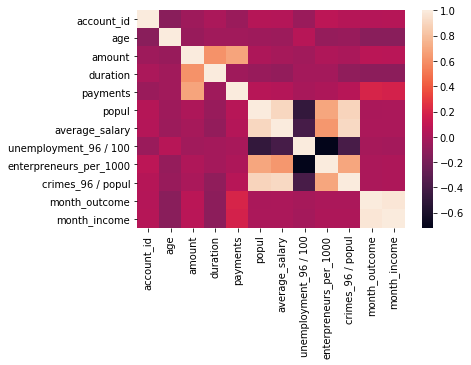

In [183]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [184]:
data['loan_type'] = data['status'].apply(lambda x: 0 if x in ['A', 'C'] else 1)

In [185]:
data.drop(['status'], axis = 1, inplace = True)

In [186]:
data

,account_id,age,gender,amount,duration,payments,popul,average_salary,unemployment_96 / 100,enterpreneurs_per_1000,crimes_96 / popul,card_type,month_outcome,month_income,loan_type
0,2,48,m,80952,24,3373.0,1204953,12541,0.0043,167,0.0822,no,12751.466667,19057.108333,0
1,19,57,f,30276,12,2523.0,103347,9104,0.0207,123,0.0228,no,5077.353846,6209.723077,1
2,25,35,m,30276,12,2523.0,228848,9893,0.0472,96,0.0257,no,15435.396610,17104.293220,0
3,37,46,m,318480,60,5308.0,70646,8547,0.0364,120,0.0218,no,5642.565217,6483.476812,1
4,38,58,f,110736,48,2307.0,51428,8402,0.0398,120,0.0214,no,1668.111111,2355.614286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,11327,19,f,39168,24,1632.0,94725,9920,0.0287,130,0.0512,no,2710.964706,3624.483824,0
678,11328,45,f,280440,60,4674.0,387570,9897,0.0196,140,0.0482,no,5541.196970,6772.762121,0
679,11349,49,f,419880,60,6998.0,1204953,12541,0.0043,167,0.0822,no,6287.454545,7036.075758,0
680,11359,28,m,54024,12,4502.0,117897,8814,0.0574,107,0.0175,classic,14315.972093,15184.474419,0


In [187]:
data['amount/salary'] = data['amount'] / data['average_salary']
data['payments/salary'] = data['payments'] / data['average_salary']
data['age * amount'] = data['age'] * data['amount']
data['age * salary'] = data['age'] * data['average_salary']
data['diff'] = data['month_income'] - data['month_outcome']

def age_group(x):
    if x < 24:
        return 1
    if x >= 24 and x < 30:
        return 2
    if x >= 30 and x < 42:
        return 3
    if x >= 42:
        return 4

def duration_group(x):
        return x // 12
    
data['age_group'] = data['age'].apply(age_group)
data['duration_group'] = data['duration'].apply(duration_group)

In [188]:
data

,account_id,age,gender,amount,duration,payments,popul,average_salary,unemployment_96 / 100,enterpreneurs_per_1000,crimes_96 / popul,card_type,month_outcome,month_income,loan_type,amount/salary,payments/salary,age * amount,age * salary,diff,age_group,duration_group
0,2,48,m,80952,24,3373.0,1204953,12541,0.0043,167,0.0822,no,12751.466667,19057.108333,0,6.454988,0.268958,3885696,601968,6305.641666,4,2
1,19,57,f,30276,12,2523.0,103347,9104,0.0207,123,0.0228,no,5077.353846,6209.723077,1,3.325571,0.277131,1725732,518928,1132.369231,4,1
2,25,35,m,30276,12,2523.0,228848,9893,0.0472,96,0.0257,no,15435.396610,17104.293220,0,3.060346,0.255029,1059660,346255,1668.896610,3,1
3,37,46,m,318480,60,5308.0,70646,8547,0.0364,120,0.0218,no,5642.565217,6483.476812,1,37.262197,0.621037,14650080,393162,840.911595,4,5
4,38,58,f,110736,48,2307.0,51428,8402,0.0398,120,0.0214,no,1668.111111,2355.614286,0,13.179719,0.274577,6422688,487316,687.503175,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,11327,19,f,39168,24,1632.0,94725,9920,0.0287,130,0.0512,no,2710.964706,3624.483824,0,3.948387,0.164516,744192,188480,913.519118,1,2
678,11328,45,f,280440,60,4674.0,387570,9897,0.0196,140,0.0482,no,5541.196970,6772.762121,0,28.335859,0.472264,12619800,445365,1231.565151,4,5
679,11349,49,f,419880,60,6998.0,1204953,12541,0.0043,167,0.0822,no,6287.454545,7036.075758,0,33.480584,0.558010,20574120,614509,748.621213,4,5
680,11359,28,m,54024,12,4502.0,117897,8814,0.0574,107,0.0175,classic,14315.972093,15184.474419,0,6.129340,0.510778,1512672,246792,868.502326,2,1


In [189]:
data['loan_type'].value_counts()

0    606
1     76
Name: loan_type, dtype: int64

In [221]:
data.describe()

,account_id,age,amount,duration,payments,popul,average_salary,unemployment_96 / 100,enterpreneurs_per_1000,crimes_96 / popul,month_outcome,month_income,loan_type,amount/salary,payments/salary,age * amount,age * salary,diff,age_group,duration_group
count,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,682.000000,682.000000,682.000000,682.000000
mean,5824.162757,37.630499,151410.175953,36.492669,4190.664223,2.638447e+05,9469.230205,0.035516,120.585044,0.036540,8517.857835,10532.474244,0.111437,16.273898,0.448644,5.607004e+06,355484.296188,2014.616409,2.935484,3.041056
std,3283.512681,12.768289,113372.406310,17.075219,2215.830344,3.494870e+05,1301.835849,0.021404,23.004614,0.019259,7682.033899,9220.332881,0.314903,12.356273,0.242660,4.683901e+06,128619.719213,2362.077451,1.095419,1.422935
min,2.000000,13.000000,4980.000000,12.000000,304.000000,4.282100e+04,8110.000000,0.004300,81.000000,0.015900,80.000000,187.037037,0.000000,0.410494,0.031421,1.801800e+05,111774.000000,-23983.800000,1.000000,1.000000
25%,2967.000000,27.000000,66732.000000,24.000000,2477.000000,8.888400e+04,8544.000000,0.019600,106.000000,0.021800,3324.995752,4171.201942,0.000000,6.846775,0.254173,2.294424e+06,251046.250000,826.091612,2.000000,2.000000
50%,5738.500000,37.000000,116928.000000,36.000000,3934.000000,1.226030e+05,8980.000000,0.034900,115.000000,0.031700,6328.967855,7793.545891,0.000000,12.868258,0.417706,4.163394e+06,350230.500000,1431.476140,3.000000,3.000000
75%,8686.000000,48.000000,210654.000000,48.000000,5813.500000,2.261220e+05,9897.000000,0.047900,132.000000,0.041400,11451.148664,13945.310116,0.000000,22.462532,0.610922,7.617180e+06,445363.500000,2442.732050,4.000000,4.000000
max,11362.000000,61.000000,590820.000000,60.000000,9910.000000,1.204953e+06,12541.000000,0.094000,167.000000,0.082200,54452.854545,61287.695455,1.000000,60.587300,1.138275,2.706000e+07,765001.000000,18872.027273,4.000000,5.000000


In [258]:
X, y = data.loc[:, data.columns != 'loan_type'], data.loc[:, 'loan_type']

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=30)

In [260]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 0.4, random_state=30)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [261]:
ros = RandomOverSampler(sampling_strategy = 0.4, random_state=30)
X_test, y_test = ros.fit_resample(X_test, y_test)

In [262]:
X_resampled

,account_id,age,gender,amount,duration,payments,popul,average_salary,unemployment_96 / 100,enterpreneurs_per_1000,crimes_96 / popul,card_type,month_outcome,month_income,amount/salary,payments/salary,age * amount,age * salary,diff,age_group,duration_group
0,5196,40,m,79824,12,6652.0,53921,8598,0.0326,123,0.0348,classic,3474.661017,4119.911864,9.284020,0.773668,3192960,343920,645.250847,3,1
1,4550,50,f,61320,60,1022.0,124605,8772,0.0498,126,0.0253,no,1418.836667,1770.811667,6.990424,0.116507,3066000,438600,351.975000,4,5
2,6856,17,f,124344,36,3454.0,161854,9425,0.0250,125,0.0240,no,8272.945098,9720.619608,13.192997,0.366472,2113848,160225,1447.674510,1,3
3,11054,19,m,148920,60,2482.0,108871,8444,0.0347,106,0.0212,no,2115.767442,3000.851163,17.636191,0.293937,2829480,160436,885.083721,1,5
4,3166,22,m,177744,48,3703.0,108871,8444,0.0347,106,0.0212,classic,9721.954167,13610.104167,21.049739,0.438536,3910368,185768,3888.150000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,3189,57,m,222180,60,3703.0,45714,8843,0.0360,113,0.0194,no,6452.927660,7993.438298,25.124958,0.418749,12664260,504051,1540.510638,4,5
673,8566,51,f,230220,36,6395.0,323870,10673,0.0544,100,0.0566,no,13412.055000,14895.290000,21.570318,0.599175,11741220,544323,1483.235000,4,3
674,808,39,m,215616,48,4492.0,42821,8173,0.0701,124,0.0317,no,4013.502564,4235.058974,26.381500,0.549615,8409024,318747,221.556410,3,4
675,442,56,f,357840,48,7455.0,387570,9897,0.0196,140,0.0482,no,5547.345098,187.037037,36.156411,0.753259,20039040,554232,-5360.308061,4,4


In [263]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_features = enc.fit_transform(X_resampled[['gender']]).toarray()

enc1 = OneHotEncoder(handle_unknown='ignore')
enc_features1 = enc1.fit_transform(X_resampled[['card_type']]).toarray()

In [264]:
enc_features1

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [265]:
X_resampled = pd.concat([X_resampled, pd.DataFrame(enc_features, columns = ['f', 'm']), pd.DataFrame(enc_features1)], axis = 1)

In [266]:
X_resampled.drop(['gender', 'card_type'], axis = 1, inplace = True)

In [267]:
pd.set_option('display.max_columns', None)

In [268]:
X_resampled

,account_id,age,amount,duration,payments,popul,average_salary,unemployment_96 / 100,enterpreneurs_per_1000,crimes_96 / popul,month_outcome,month_income,amount/salary,payments/salary,age * amount,age * salary,diff,age_group,duration_group,f,m,0,1,2,3
0,5196,40,79824,12,6652.0,53921,8598,0.0326,123,0.0348,3474.661017,4119.911864,9.284020,0.773668,3192960,343920,645.250847,3,1,0.0,1.0,1.0,0.0,0.0,0.0
1,4550,50,61320,60,1022.0,124605,8772,0.0498,126,0.0253,1418.836667,1770.811667,6.990424,0.116507,3066000,438600,351.975000,4,5,1.0,0.0,0.0,0.0,0.0,1.0
2,6856,17,124344,36,3454.0,161854,9425,0.0250,125,0.0240,8272.945098,9720.619608,13.192997,0.366472,2113848,160225,1447.674510,1,3,1.0,0.0,0.0,0.0,0.0,1.0
3,11054,19,148920,60,2482.0,108871,8444,0.0347,106,0.0212,2115.767442,3000.851163,17.636191,0.293937,2829480,160436,885.083721,1,5,0.0,1.0,0.0,0.0,0.0,1.0
4,3166,22,177744,48,3703.0,108871,8444,0.0347,106,0.0212,9721.954167,13610.104167,21.049739,0.438536,3910368,185768,3888.150000,1,4,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,3189,57,222180,60,3703.0,45714,8843,0.0360,113,0.0194,6452.927660,7993.438298,25.124958,0.418749,12664260,504051,1540.510638,4,5,0.0,1.0,0.0,0.0,0.0,1.0
673,8566,51,230220,36,6395.0,323870,10673,0.0544,100,0.0566,13412.055000,14895.290000,21.570318,0.599175,11741220,544323,1483.235000,4,3,1.0,0.0,0.0,0.0,0.0,1.0
674,808,39,215616,48,4492.0,42821,8173,0.0701,124,0.0317,4013.502564,4235.058974,26.381500,0.549615,8409024,318747,221.556410,3,4,0.0,1.0,0.0,0.0,0.0,1.0
675,442,56,357840,48,7455.0,387570,9897,0.0196,140,0.0482,5547.345098,187.037037,36.156411,0.753259,20039040,554232,-5360.308061,4,4,1.0,0.0,0.0,0.0,0.0,1.0


In [269]:
X_resampled.columns

Index([            'account_id',                    'age',
                       'amount',               'duration',
                     'payments',                  'popul',
               'average_salary',  'unemployment_96 / 100',
       'enterpreneurs_per_1000',      'crimes_96 / popul',
                'month_outcome',           'month_income',
                'amount/salary',        'payments/salary',
                 'age * amount',           'age * salary',
                         'diff',              'age_group',
               'duration_group',                      'f',
                            'm',                        0,
                              1,                        2,
                              3],
      dtype='object')

In [270]:
scaler = StandardScaler()
columns = X_resampled.columns
X_resampled = scaler.fit_transform(X_resampled)
X_resampled = pd.DataFrame(X_resampled, columns = columns)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [271]:
X_resampled

,account_id,age,amount,duration,payments,popul,average_salary,unemployment_96 / 100,enterpreneurs_per_1000,crimes_96 / popul,month_outcome,month_income,amount/salary,payments/salary,age * amount,age * salary,diff,age_group,duration_group,f,m,0,1,2,3
0,-0.083637,0.212799,-0.723464,-1.495160,0.963181,-0.601986,-0.659637,-0.210952,0.175675,-0.056601,-0.670018,-0.697607,-0.665626,1.172672,-0.586039,-0.058579,-0.445002,0.087439,-1.495160,-1.075198,1.075198,2.308052,-0.150528,-0.174475,-1.941032
1,-0.278676,0.995761,-0.879751,1.350162,-1.510953,-0.391098,-0.523276,0.596414,0.307091,-0.562126,-0.933280,-0.951008,-0.844598,-1.445963,-0.612153,0.674034,-0.550692,0.984352,1.350162,0.930061,-0.930061,-0.433266,-0.150528,-0.174475,0.515190
2,0.417548,-1.588014,-0.347443,-0.072499,-0.442197,-0.279964,-0.011533,-0.567695,0.263286,-0.631303,-0.055565,-0.093450,-0.360605,-0.449910,-0.808005,-1.479972,-0.155828,-1.706387,-0.072499,0.930061,-0.930061,-0.433266,-0.150528,-0.174475,0.515190
3,1.685000,-1.431421,-0.139872,1.350162,-0.869348,-0.438041,-0.780324,-0.112378,-0.569018,-0.780300,-0.844033,-0.818321,-0.013898,-0.738948,-0.660804,-1.478339,-0.358572,-1.706387,1.350162,-1.075198,1.075198,-0.433266,-0.150528,-0.174475,0.515190
4,-0.696531,-1.196533,0.103579,0.638832,-0.332773,-0.438041,-0.780324,-0.112378,-0.569018,-0.780300,0.129991,0.326114,0.252465,-0.162751,-0.438472,-1.282326,0.723660,-1.706387,0.638832,-1.075198,1.075198,2.308052,-0.150528,-0.174475,-1.941032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,-0.689587,1.543835,0.478890,1.350162,-0.332773,-0.626472,-0.467635,-0.051357,-0.262380,-0.876083,-0.288630,-0.279764,0.570459,-0.241598,1.362147,1.180480,-0.122372,0.984352,1.350162,-1.075198,1.075198,-0.433266,-0.150528,-0.174475,0.515190
673,0.933828,1.074057,0.546797,-0.072499,0.850241,0.203417,0.966500,0.812338,-0.831851,1.103446,0.602533,0.464749,0.293087,0.477359,1.172283,1.492096,-0.143013,0.984352,-0.072499,0.930061,-0.930061,-0.433266,-0.150528,-0.174475,0.515190
674,-1.408454,0.134503,0.423450,0.638832,0.013957,-0.635104,-0.992701,1.549294,0.219480,-0.221562,-0.601016,-0.685186,0.668508,0.279870,0.486872,-0.253363,-0.597691,0.087439,0.638832,-1.075198,1.075198,-0.433266,-0.150528,-0.174475,0.515190
675,-1.518956,1.465539,1.624690,0.638832,1.316064,0.393468,0.358364,-0.821171,0.920368,0.656455,-0.404596,-1.121852,1.431255,1.091344,2.879091,1.568769,-2.609260,0.984352,0.638832,0.930061,-0.930061,-0.433266,-0.150528,-0.174475,0.515190


In [272]:
enc_features = enc.transform(X_test[['gender']]).toarray()
X_test.drop(['gender'], axis = 1, inplace = True)

enc_features1 = enc1.transform(X_test[['card_type']]).toarray()
X_test.drop(['card_type'], axis = 1, inplace = True)

X_test = pd.concat([X_test, pd.DataFrame(enc_features, columns = ['f', 'm']), pd.DataFrame(enc_features1)], axis = 1)
columns = X_test.columns
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [273]:
X_test

,account_id,age,amount,duration,payments,popul,average_salary,unemployment_96 / 100,enterpreneurs_per_1000,crimes_96 / popul,month_outcome,month_income,amount/salary,payments/salary,age * amount,age * salary,diff,age_group,duration_group,f,m,0,1,2,3
0,0.911486,0.134503,-0.672483,1.350162,-1.331216,-0.497673,-0.730952,-0.872805,0.569924,-0.306703,-0.544987,-0.529183,-0.602511,-1.239921,-0.554037,-0.152570,-0.234194,0.087439,1.350162,0.930061,-0.930061,2.308052,-0.150528,-0.174475,-1.941032
1,1.124942,0.839169,-1.148945,-1.495160,-0.881653,-0.088218,-0.349299,0.507228,-0.393796,0.257357,-1.046287,-0.976811,-1.134580,-0.822978,-0.952061,0.620736,-0.318874,0.984352,-1.495160,-1.075198,1.075198,-0.433266,-0.150528,-0.174475,0.515190
2,-0.620447,-0.256978,0.352908,0.638832,-0.062508,-0.476719,-0.824210,-0.361160,-1.401322,-0.982510,-0.267622,-0.234532,0.538047,0.141074,0.206708,-0.513004,-0.030382,0.087439,0.638832,-1.075198,1.075198,-0.433266,-0.150528,-0.174475,0.515190
3,-0.033518,1.465539,0.315610,0.638832,-0.102938,-0.382851,-0.839100,1.018873,-0.525213,-0.737729,-0.477137,-0.457324,0.501250,0.101927,1.093763,0.906663,-0.185072,0.984352,0.638832,0.930061,-0.930061,-0.433266,-0.150528,-0.174475,0.515190
4,-0.454694,1.622131,-0.683125,-0.072499,-0.927356,0.393468,0.358364,-0.821171,0.920368,0.656455,-0.747593,-0.761948,-0.723055,-0.964051,-0.233513,1.721931,-0.441642,0.984352,-0.072499,-1.075198,1.075198,-0.433266,-0.150528,-0.174475,0.515190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,-1.641233,0.682576,1.292251,1.350162,0.372553,-0.552087,-0.699604,-0.032581,0.044258,-0.748372,-0.392403,-0.442646,1.517541,0.564470,1.770617,0.322445,-0.374491,0.984352,1.350162,-1.075198,1.075198,-0.433266,-0.150528,-0.174475,0.515190
166,-0.531985,-0.413571,2.495822,1.350162,1.416260,-0.538404,-0.360271,-0.703821,-0.349991,0.081753,-0.820156,-0.815916,2.615585,1.499023,1.791449,-0.496229,-0.417731,0.087439,1.350162,0.930061,-0.930061,-0.433266,-0.150528,-0.174475,0.515190
167,0.184165,-1.431421,1.650231,0.638832,1.343750,-0.530256,-0.700388,0.145791,0.307091,0.220108,0.016593,0.053322,1.904877,1.595223,0.167511,-1.463343,0.131440,-1.706387,0.638832,0.930061,-0.930061,-0.433266,-0.150528,-0.174475,0.515190
168,-0.531985,-0.413571,2.495822,1.350162,1.416260,-0.538404,-0.360271,-0.703821,-0.349991,0.081753,-0.820156,-0.815916,2.615585,1.499023,1.791449,-0.496229,-0.417731,0.087439,1.350162,0.930061,-0.930061,-0.433266,-0.150528,-0.174475,0.515190


In [274]:
logit = LogisticRegression(C = 0.422, 
                           class_weight = 'balanced', 
                           max_iter = 1000, 
                           penalty = 'l2', 
                           solver = 'liblinear',
                           random_state = 12)

In [275]:
y_resampled.value_counts(normalize = True)

0    0.714919
1    0.285081
Name: loan_type, dtype: float64

In [276]:
y_test.value_counts(normalize = True)

0    0.717647
1    0.282353
Name: loan_type, dtype: float64

In [277]:
y_test.value_counts()

0    122
1     48
Name: loan_type, dtype: int64

In [278]:
logit.fit(X_resampled, y_resampled)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(C=0.422, class_weight='balanced', max_iter=1000,
                   random_state=12, solver='liblinear')

In [279]:
predictions = logit.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [280]:
confusion_matrix(y_test, predictions)

array([[88, 34],
       [31, 17]], dtype=int64)

In [281]:
print(confusion_matrix(y_test, predictions))

[[88 34]
 [31 17]]


In [282]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [283]:
tn # Дали тем, кому должны были 0 = 0

88

In [284]:
fp # Не дали тем, кому должны были 1 != 0

34

In [285]:
fn # Дали тем, кому не должны были 0 != 1

31

In [286]:
tp # Не дали тем, кому не должны были 1 = 1

17

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


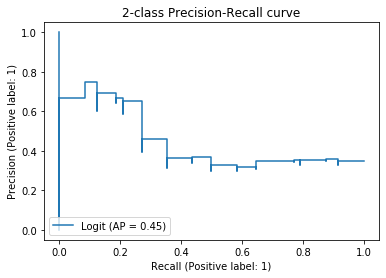

In [287]:
y_score = logit.decision_function(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="Logit")
_ = display.ax_.set_title("2-class Precision-Recall curve")


In [288]:
f1_score(y_test, predictions, average='weighted')

0.6210604951146812

In [98]:
import numpy as np

In [99]:
X_resampled

,account_id,age,amount,duration,payments,popul,average_salary,unemployment_96 / 100,enterpreneurs_per_1000,crimes_96 / popul,month_outcome,month_income,amount/salary,payments/salary,age * amount,age * salary,diff,age_group,duration_group,f,m,0,1,2,3
0,1.358011,-0.766746,-0.169477,-0.739150,0.614241,-0.581531,-0.648609,-1.112348,-0.860944,-0.919345,-0.159400,-0.254124,-0.073417,0.793843,-0.418222,-0.884931,-0.535043,-0.875036,-0.739150,-0.995578,0.995578,-0.440458,-0.134332,-0.169928,0.512893
1,-1.769238,1.025628,-0.590485,-1.462278,1.372712,-0.368517,-0.087831,1.664568,-0.994842,0.964636,-0.586869,-0.478238,-0.582480,1.329226,-0.269257,0.911523,0.059951,0.942140,-1.462278,1.004441,-1.004441,2.270362,-0.134332,-0.169928,-1.949723
2,1.015020,-0.065382,1.460583,0.707106,1.074806,2.921611,2.506067,-1.503597,2.129451,2.526429,-0.417674,-0.464377,0.719081,0.288925,1.323668,0.825852,-0.507705,0.033552,0.707106,1.004441,-1.004441,-0.440458,-0.134332,-0.169928,0.512893
3,1.470257,1.415275,-0.192035,-0.739150,0.566162,-0.430382,-0.540798,0.347680,0.790468,-0.001928,-0.317508,-0.286015,-0.116500,0.703248,0.372623,1.027213,-0.088624,0.942140,-0.739150,-0.995578,0.995578,-0.440458,-0.134332,-0.169928,0.512893
4,-1.500036,-0.532958,-0.412342,1.430234,-1.124672,-0.521759,-0.708146,0.209311,0.299508,0.221966,-0.559810,-0.560157,-0.322671,-1.021603,-0.514640,-0.703862,-0.404221,0.033552,1.430234,1.004441,-1.004441,2.270362,-0.134332,-0.169928,-1.949723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,-0.248761,1.415275,-0.234304,-0.016022,-0.328906,-0.544115,-0.707342,0.028001,0.031711,-0.771903,-0.212718,-0.178178,-0.132013,-0.180408,0.314626,0.938146,0.000273,0.942140,-0.016022,-0.995578,0.995578,-0.440458,-0.134332,-0.169928,0.512893
673,-1.220203,0.090476,-0.863497,-1.462278,0.208944,-0.521759,-0.708146,0.209311,0.299508,0.221966,-0.399428,-0.482906,-0.806166,0.388481,-0.758550,-0.178557,-0.657793,0.033552,-1.462278,-0.995578,0.995578,-0.440458,-0.134332,-0.169928,0.512893
674,0.867756,1.025628,0.654935,-0.016022,0.934614,0.229577,1.003151,0.886841,-0.860944,1.128461,0.710611,0.544896,0.389204,0.550277,1.286991,1.442883,-0.224283,0.942140,-0.016022,1.004441,-1.004441,-0.440458,-0.134332,-0.169928,0.512893
675,-0.415410,1.726992,-0.783385,-0.739150,-0.694213,-0.203805,-0.547234,0.075714,-1.307272,-0.629921,-0.931283,-0.900071,-0.734623,-0.596555,-0.381527,1.292570,-0.531375,0.942140,-0.739150,-0.995578,0.995578,-0.440458,-0.134332,-0.169928,0.512893


In [100]:
# The estimated coefficients will all be around 1:
print(logit.coef_)

[[-0.12885907 -0.47605949  0.86649148 -0.23173515  0.46478182 -0.3747951
  -0.15181895 -0.25536453 -0.59218758  0.43555945 -0.05018481 -0.04844223
  -0.17805797 -0.4378599   0.10329233  0.49497339 -0.02836541  0.06697912
  -0.23173515 -0.15290293  0.15290293 -0.2917601  -0.39437198 -0.48435323
   0.59019261]]


In [101]:
X_resampled.columns

Index([            'account_id',                    'age',
                       'amount',               'duration',
                     'payments',                  'popul',
               'average_salary',  'unemployment_96 / 100',
       'enterpreneurs_per_1000',      'crimes_96 / popul',
                'month_outcome',           'month_income',
                'amount/salary',        'payments/salary',
                 'age * amount',           'age * salary',
                         'diff',              'age_group',
               'duration_group',                      'f',
                            'm',                        0,
                              1,                        2,
                              3],
      dtype='object')

In [54]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.linspace(0.1,3,10), 
      "penalty":["l1","l2"], 
      "class_weight" : ['balanced'], 
      "solver" : ['liblinear', 'lbfgs', 'newton-cg'], 
      "max_iter" : [1000]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_resampled,y_resampled)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

tuned hyperparameters :(best parameters)  {'C': 0.42222222222222217, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.6778314310798947


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: F

In [55]:
logreg_cv.best_estimator_.coef_

array([[-0.41595532,  0.86393949, -0.22729432,  0.47485996, -0.01447725,
        -0.14124114, -0.20776847, -0.64875994,  0.50583785, -0.19574552,
        -0.44735343, -0.12329576, -0.36690938,  0.13302497,  0.45932324,
         0.04751976, -0.22729432, -0.15080423,  0.15080423, -0.28289084,
        -0.42216823, -0.51150139,  0.60220943]])

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
clf = RandomForestClassifier(n_estimators = 1000, max_depth = 4, class_weight = 'balanced', random_state = 0)

In [58]:
clf.fit(X_resampled, y_resampled)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=1000,
                       random_state=0)

In [59]:
predictions = clf.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [60]:
confusion_matrix(y_test, predictions)

array([[73, 49],
       [10, 38]], dtype=int64)

In [61]:
f1_score(y_test, predictions, average='weighted')

0.6700589829427707